# Co-ocorrências
Este notebook é parte da documentação de uma exploração de dados realizada para o artigo _**O uso da Cloroquina no tratamento da Covid-19 debatido no Facebook**: um estudo em opinião pública com processamento de linguagem natural_.

A análise de co-ocorrências é mais uma forma clássica de análise de conteúdo. Levanta a quantidade de vezes que termos ocorrem juntamente a outros. Existem algumas formas de se fazer isso. Aqui, primeiramente a ideia é comprar as frequências entre datasets levantadas no notebook anterior. 

## Importando e lendo os dados
Tentei muito muito muito mesmo automatizar a criação dessas tabelas, mas perdi mais tempo tentando do que fazendo o processo de copiar e colar manualmente com o Google Docs.

In [1]:
# montando o Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Esses arquivos todos abaixo são frutos de experimentações para tentar encontrar a melhor forma de exibir esses dados. Na pasta "~arquivo" tem mais coisas, mas são recortes, uma tabela XLS onde fiz algum tratamento manual, alguns CSV que testei e não foram usados aqui etc. Ficam para registro e backup.

In [4]:
# Caminho dos arquivos
!ls '/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/co-ocorrências'

'~arquivo'		    coocorrencias.pdf
'co-ocorrencias - 15.csv'  'co-ocorrencias - transposta.csv'
'co-ocorrencias - 30.csv'   relativa-15.csv
'co-ocorrencias - 50.csv'  'transposta relativa.csv'
 co-ocorrencias.csv


## Visualizando as co-ocorrências
Para gerar o tipo de gráfico que precisamos para mostrar as co-ocorrências de termos entre cada thread de comentários, vamos criar um gráfico de barras empilhadas. Em inglês, pode ser chamado de _pilled bars chart_ ou ainda _stacked bars chart_ — existe alguma discussão sobre qual desses nomes é mais apropriado, mas não importa para os nossos propósitos aqui.

A tabela abaixo é toda a coleção de termos frequentes levantadas nas limpezas do texto que foram feitas para os processos anteriores. O processo aqui vai ser o de exibir e plotar tudo, e depois ir polindo a visualização. Para esse gráfico, os dados precisam ser transpostos. Fiz esse processo já nas Planilhas do Google para não ter que ficar fazendo malabarismos com o Pandas.

In [6]:
# importando o pandas e exibindo uma versão transposta da tabela
import pandas as pd
cootransp = pd.read_csv('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/co-ocorrências/co-ocorrencias - transposta.csv')
cootransp

,Termo,uti,"uso, usa, usar, usado","pessoas, pessoa",alta,"cloroquina, hidroxicloroquina, hydroxychloroquine","pacientes, paciente",🙏,deus,quatro,"coronavírus, coronavirus, corona",sp,ser,brasil,fake,gente,"covid-19, covid",vírus,remédio,verdade,ver,texto,todos,"notícias, noticia","medicamento, medicamentos, medicação",contra,"hospital, hospitalização",agora,😂,"diz, dizendo",porque,pandemia,população,graças,👏,saúde,casos,amém,"morre, morreu, morrer, mortes","estudo, estudos",...,"faz, fazendo, fazer, fez",bem,anos,tratamento,mandetta,receita,"fala, falar","nenhum, nenhuma",dr,"resultados, resultados",alho,cebola,🤣,dexametasona,sempre,sintomas,"corticoide, corticóide",vários,cru,amiga,suco,nunca,trump,zinco,eficaz,"preventivamente, prevenção",quiser,povo,malária,combinação,"ciência, cientistas",indica,tempo,oms,razão,gado,governo,cara,pt,"recomenda, recomendar"
0,Freq1,49,48,53,43,89,42,37,36,34,39,27,24,23,23,20,19,19,18,17,17,15,15,22,14,13,22,13,13,13,12,12,12,12,12,12,11,11,21,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Freq2,0,0,23,0,22,6,0,13,0,24,0,14,0,20,9,11,0,23,13,16,0,8,6,19,18,0,7,9,11,0,0,0,0,0,0,0,0,12,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Freq3,0,34,34,0,37,27,0,9,0,36,0,34,11,0,12,22,18,40,0,0,0,14,0,51,13,0,9,0,0,15,9,0,0,0,15,0,0,0,0,...,25,15,14,14,13,13,12,11,11,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Freq4,0,19,46,0,66,0,0,0,0,0,0,24,0,0,14,23,28,29,11,9,19,23,0,13,12,0,22,0,16,10,0,0,0,0,10,0,0,0,32,...,26,15,11,14,0,0,12,0,0,11,52,23,18,17,16,14,25,14,13,13,13,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Freq5,0,41,41,0,157,15,0,0,0,12,0,35,22,0,21,60,0,41,0,0,15,21,0,27,16,0,19,47,30,20,0,0,0,0,0,0,0,30,37,...,37,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,46,19,16,32,16,15,14,13,12,12,12,0,0,0,0,0,0,0
5,Freq6,0,24,35,0,73,0,0,10,0,8,0,36,11,9,19,17,9,12,0,9,30,0,0,12,10,0,9,39,37,8,0,0,0,0,0,0,0,19,28,...,24,11,0,0,0,0,8,9,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,9,0,8,19,16,15,12,9,8,0
6,Freq7,0,28,26,0,60,0,0,35,0,0,0,35,15,0,23,17,0,13,13,10,10,12,0,0,10,0,21,0,18,0,0,0,0,0,12,0,0,0,9,...,41,14,14,13,0,0,26,0,0,0,0,0,51,0,0,0,0,0,0,0,0,12,0,0,0,0,0,17,0,0,0,0,10,0,0,0,0,13,14,30


Para plotar o gráfico, é relativamente simples: precisamos do MatPlotLib e do Numpy, e acertar os parâmetros da função que plota. No caso, **kind** é o tipo (bar), **stacked** empilha as barras, e as legendas estão desativadas porque são muitos termos e ela se sobrepõe ao gráfico, atrapalha o resultado aqui. Mas como não é o gráfico final pretendido, não tem problema.

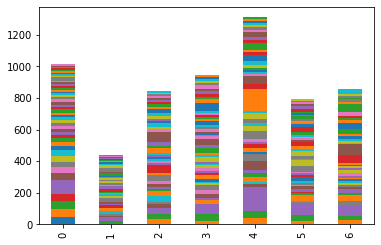

In [7]:
# nossa biblioteca de visualização de dados favorita (& numpy)
import matplotlib.pyplot as plt
import numpy as np

cootransp.plot(kind='bar', stacked=True, legend=False)

Outra coisa que deve ser considerada é a proporcionalidade da presença de cada termo relativa ao todo de seu grupo. Isso não é regra, mas aqui se aplica. Nesse caso, usamos as frequências relativas (%).

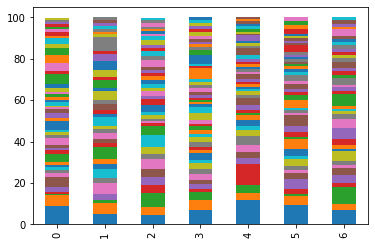

In [8]:
# dados já transpostos e com a frequência relativa à amostra já calculada e com pontos em vez de vírgula
coorelativ = pd.read_csv('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/co-ocorrências/transposta relativa.csv')
coorelativ.plot(kind='bar', stacked=True, legend=False)

Abaixo, alguns testes que fiz plotando as frequências absolutas (50, 30 e 15 termos). Dei uma enxugada na tabela para exibir só os termos mais frequentes em todas as threads de discussão. Algumas threads têm muita presença de um termo que não está presente nas outras, enquanto que outros termos se repetem em várias delas, mas em baixa frequência. Esse "filtro" levou isso em consideração.

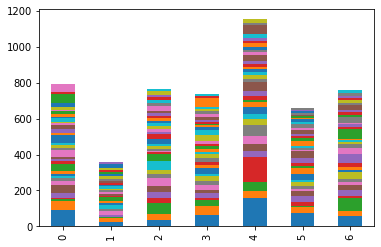

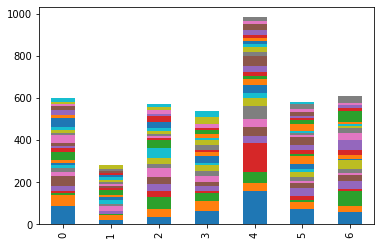

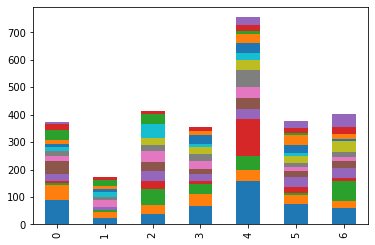

In [9]:
# os 50 termos mais citados, em números absolutos
coo_50 = pd.read_csv('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/co-ocorrências/co-ocorrencias - 50.csv')
coo_50.plot(kind='bar', stacked=True, legend=False)

# os 30 termos mais citados, em números absolutos
coo_30 = pd.read_csv('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/co-ocorrências/co-ocorrencias - 30.csv')
coo_30.plot(kind='bar', stacked=True, legend=False)

# os 15 termos mais citados, em números absolutos
coo_15 = pd.read_csv('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/co-ocorrências/co-ocorrencias - 15.csv')
coo_15.plot(kind='bar', stacked=True, legend=False)

Esse gráfico com os 15 termos mais frequentes pareceu bastante promissor para nossos propósitos. Por isso, criei um CSV com suas frequências relativas para plotar o gráfico final. Acertei os parâmetros — [colomaps](https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html), principalmente — pra deixar ele um pouco mais bonito e legível e posicionar a legenda fora da área das barras. Meus colormaps favoritos até o momento são: _viridis_ (usado no gráfico), _gnuplot_ e _plasma_.

Para o artigo, quero gerar uma versão dele em PDF ([aqui tem um tutorialzinho](https://datatofish.com/export-matplotlib-pdf/)) para editar no Illustrator e deixar essas informações ainda mais palatáveis.

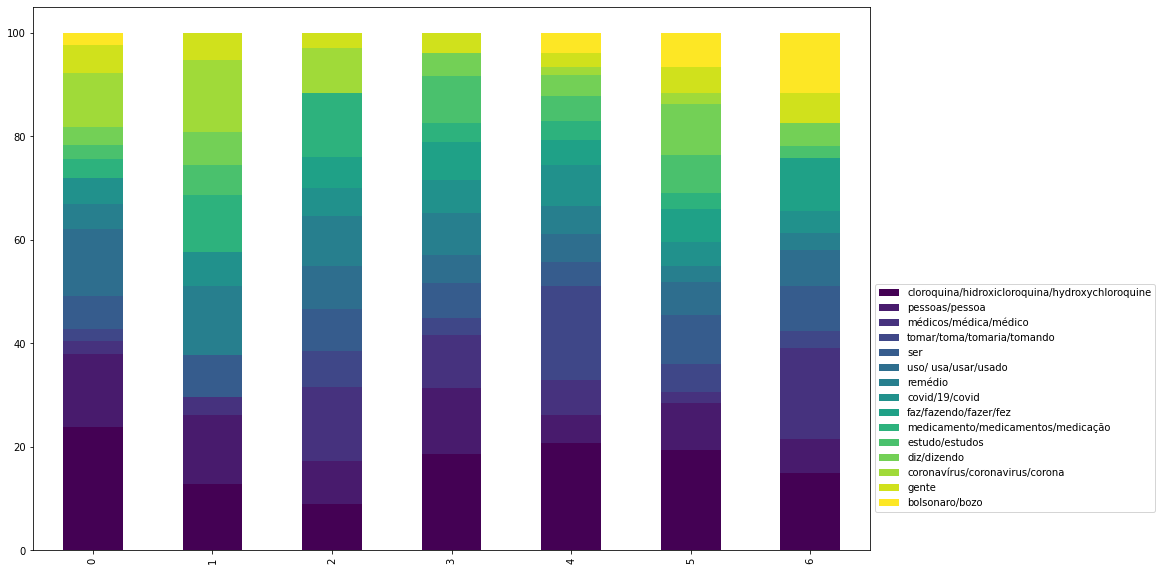

In [10]:
# biblioteca para exportar em PDF
from matplotlib.backends.backend_pdf import PdfPages

# os 15 termos mais citados
with PdfPages(r'/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/co-ocorrências/coocorrencias.pdf') as export_pdf:
  cooc_15 = pd.read_csv('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/co-ocorrências/relativa-15.csv')
  cooc_15.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='viridis').legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
  export_pdf.savefig()

Ainda que esse gráfico exiba de forma interessante como os termos ocorrem nos diferentes tópicos de discussão, ele é redundante. Esse recorte exibe os temas da discussão, mas não esclarece o seu contexto de uso. Nele podemos ver menções a Bolsonaro, a recomendações médicas e aos estudos feitos para testar a eficácia da aplicação da cloroquina e hidroxicloroquina, tem algumas palavras perdidas... Mas esse contexto só será provido por outros tipos de análise, que levem em conta sequências de palavras onde esses termos são usados. Isso será abordado no próximo notebook.